In [1]:
#freq of each 0's,(black) 1's ...255's(white) is plotted
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10

In [2]:
img_post=cv2.imread('Original_image\Apple1.png')
img_post_stego=cv2.imread('Encoded_image\lsb_Apple1.png')

img_post=cv2.resize(img_post, (800,600))
img_post_stego=cv2.resize(img_post_stego, (800,600))
print(img_post.shape) # 600 rows, 800 cols, 3 channels

(600, 800, 3)


In [3]:
#converting the img into binary
img_gray=cv2.cvtColor(img_post, cv2.COLOR_BGR2GRAY)

img_gray_stego=cv2.cvtColor(img_post_stego, cv2.COLOR_BGR2GRAY)

print(img_gray.shape)

#enhancing the whites to be lighter and the greys to darker
#img_gray=cv2.convertScaleAbs(img_gray, alpha=1.10, beta=-20) #alpha is contrast, beta is brightness
#img_gray_stego=cv2.convertScaleAbs(img_gray, alpha=1.10, beta=-20)

(600, 800)


In [4]:
#creating a numpy array of 0s
arr=np.zeros(shape=(256,1))
rows=img_post.shape[0]
cols=img_post.shape[1]
for i in range(rows):
  for j in range(cols):
    #read kth position and add 1 in it
    k=img_gray[i,j]
    arr[k,0]=arr[k,0]+1


#we get total no of values for each pixel in the image in normal image
#print(arr)

In [5]:
#for stego image
arr_stego=np.zeros(shape=(256,1))
for i in range(rows):
  for j in range(cols):
    #read kth position and add 1 in it
    k=img_gray_stego[i,j]
    arr_stego[k,0]=arr_stego[k,0]+1

#we get total no of values for each pixel in the image in normal image
#print(arr_stego)

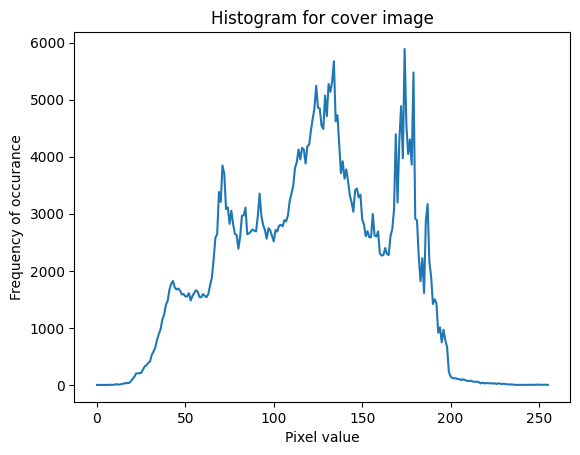

In [6]:
plt.plot(arr)
plt.title("Histogram for cover image")
plt.xlabel("Pixel value")
plt.ylabel("Frequency of occurance")
plt.show()

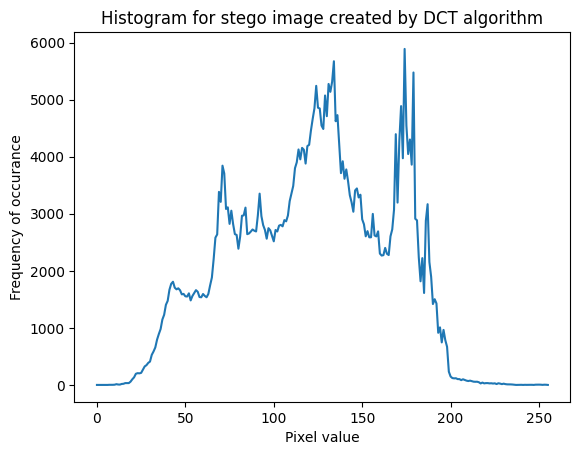

In [7]:
plt.plot(arr_stego)
plt.title("Histogram for stego image created by DCT algorithm")
plt.xlabel("Pixel value")
plt.ylabel("Frequency of occurance")
plt.show()

In [32]:
#finding the difference between the 2 frequency arrays
diff_arr=arr-arr_stego
diff_arr=np.round(diff_arr, 2)

#minr=abs(math.floor(np.amin(diff_arr)))
#maxr=abs(math.floor(np.amax(diff_arr))) 

#freq_diff=np.zeros(shape=(minr,maxr))
#creating histogram of difference
#for i in range(diff_arr.shape[0]):
#  k=diff_arr[i]
#  k=math.floor(k)
#  k=abs(k)
#  freq_diff[k,0]=freq_diff[k,0]+1

# plt.plot(diff_arr)
# plt.title("Difference plot for Edge detection based algorithm")
# plt.xlabel("Color coordinate")
# plt.ylabel("Frequency of pixel difference")
#plt.show()
#print(diff_arr)

In [33]:
#print(len(diff_arr))
#print(diff_arr)
diff_arr_lst = []
for i in diff_arr:
    k = int(i)
    if (k < -10) or (k > 10):
        diff_arr_lst.append(int(i))

print(len(diff_arr_lst)/256)
#print(diff_arr_lst)

0.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1380\2377755638.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = int(i)


In [34]:
count_pairs=0

for i in range(diff_arr.shape[0]-1):
  p1=diff_arr[i]
  p2=diff_arr[i+1]
  if(p1 != p2 and p1==abs(p2)):
    count_pairs=count_pairs+1
  
print(count_pairs)

0


In [35]:
#CHI SQUARE DISTANCE sum((p-q)^2/(p+q)^2) from 1 to 256

dist=0

for i in range(arr.shape[0]):
  p=arr[i]
  q=arr_stego[i]
  if(p+q!=0):
    dist=dist+(pow((p-q),2))/(pow((p+q),2))

print("Probability of being a steganoimage:", dist)

#if dist > 0.5 then stego?

Probability of being a steganoimage: [3.1374807e-07]


In [62]:
def calc_PSNR(stego_image, orignal_image):
    mse = np.mean((orignal_image - stego_image)**2)
    maxi_pix = 255*255
    psnr_value = 10*log10(maxi_pix/mse)
    return psnr_value

stego_image = cv2.imread("./rev2_imgevd2_img.png_img.pngpvd2_img.png",0)
orignal_image =  cv2.imread("./pup.jpg",0)
res = calc_PSNR(stego_image,orignal_image)
print(f"PSNR value is {res} dB")

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'